## Wilcoxon Signed-Rank Test

The Wilcoxon signed-rank test is a non-parametric test used to compare two related samples to determine whether their population mean ranks differ. It is often used as an alternative to the paired t-test when the data does not necessarily follow a normal distribution.

**Formulate Hypotheses**:

   - **Null Hypothesis ($H_0$)**: There is no significant difference in the performance metrics between the models.
   - **Alternative Hypothesis ($H_1$)**: There is a significant difference in the performance metrics between the models.




In [19]:
from scipy.stats import wilcoxon
import numpy as np
import matplotlib.pyplot as plt

# Performance metrics for SAM
sam_metrics = {
    "Mean Loss": 0.0052,
    "Mean IoU": 0.6757,
    "Mean Accuracy": 0.9919,
    "Mean Precision": 0.8609,
    "Mean Recall": 0.8344,
    "Mean F1 Score": 0.8348,
    "Mean Dice Score": 0.7786
}

# Performance metrics for SAM+FeatUP
sam_featup_metrics = {
    "Mean Loss": 0.0159,
    "Mean IoU": 0.8537,
    "Mean Accuracy": 0.9762,
    "Mean Precision": 0.5728,
    "Mean Recall": 0.4258,
    "Mean F1 Score": 0.4351,
    "Mean Dice Score": 0.3395
}

# Performance metrics for SAM+GAFL
sam_gafl_metrics = {
    "Mean Loss": 0.0043,
    "Mean IoU": 0.7125,
    "Mean Accuracy": 0.9931,
    "Mean Precision": 0.7842,
    "Mean Recall": 0.8880,
    "Mean F1 Score": 0.8145,
    "Mean Dice Score": 0.8148
}

# Convert metrics to lists
sam_values = list(sam_metrics.values())
sam_featup_values = list(sam_featup_metrics.values())
sam_gafl_values = list(sam_gafl_metrics.values())

# Perform Wilcoxon signed-rank test
stat_featup, p_featup = wilcoxon(sam_values, sam_featup_values)
stat_gafl, p_gafl = wilcoxon(sam_values, sam_gafl_values)

print(f"Wilcoxon test between SAM and SAM+FeatUP: statistic={stat_featup}, p-value={p_featup}")
print(f"Wilcoxon test between SAM and SAM+GAFL: statistic={stat_gafl}, p-value={p_gafl}")

Wilcoxon test between SAM and SAM+FeatUP: statistic=4.0, p-value=0.109375
Wilcoxon test between SAM and SAM+GAFL: statistic=11.0, p-value=0.6875


In [21]:
from scipy.stats import ttest_rel
# Perform paired T-test
t_stat_featup, p_value_featup = ttest_rel(sam_values, sam_featup_values)
t_stat_gafl, p_value_gafl = ttest_rel(sam_values, sam_gafl_values)

print(f"T-test between SAM and SAM+FeatUP: t-statistic={t_stat_featup}, p-value={p_value_featup}")
print(f"T-test between SAM and SAM+GAFL: t-statistic={t_stat_gafl}, p-value={p_value_gafl}")

T-test between SAM and SAM+FeatUP: t-statistic=2.075549783359998, p-value=0.08324574093347938
T-test between SAM and SAM+GAFL: t-statistic=-0.25584216562285206, p-value=0.8066179600245266


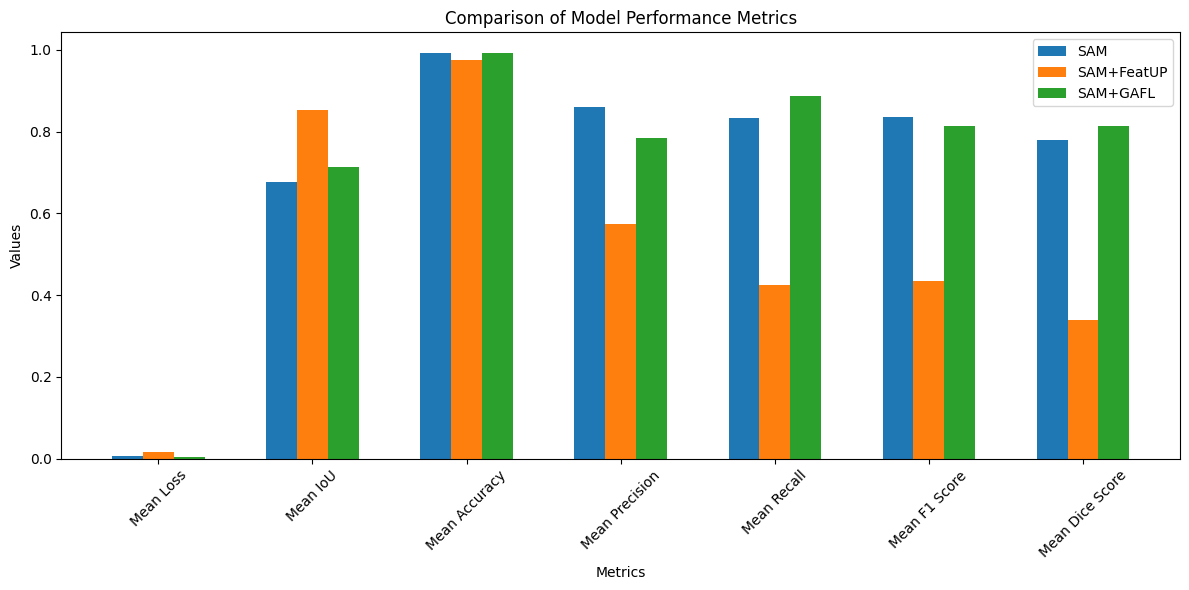

In [18]:
# Plotting the metrics for visual comparison
metrics = list(sam_metrics.keys())
x = np.arange(len(metrics))

fig, ax = plt.subplots(figsize=(12, 6))
width = 0.2

ax.bar(x - width, sam_values, width, label='SAM')
ax.bar(x, sam_featup_values, width, label='SAM+FeatUP')
ax.bar(x + width, sam_gafl_values, width, label='SAM+GAFL')

ax.set_xlabel('Metrics')
ax.set_ylabel('Values')
ax.set_title('Comparison of Model Performance Metrics')
ax.set_xticks(x)
ax.set_xticklabels(metrics, rotation=45)
ax.legend()

plt.tight_layout()
plt.show()


### Interpretation of Results

#### Wilcoxon Signed-Rank Test

- **SAM vs. SAM+FeatUP**:
  - The p-value is 0.109375, which is greater than the common significance level of 0.05. Therefore, we fail to reject the null hypothesis. This means that there is no statistically significant difference between the performance metrics of the SAM and SAM+FeatUP models.
  
- **SAM vs. SAM+GAFL**:
  - The p-value is 0.6875, which is also greater than the common significance level of 0.05. Therefore, we fail to reject the null hypothesis. This means that there is no statistically significant difference between the performance metrics of the SAM and SAM+GAFL models.

#### Paired T-Test

- **SAM vs. SAM+FeatUP**:
  - The p-value is 0.08324574093347938, which is greater than the common significance level of 0.05 but less than 0.10. This suggests that there is a marginally significant difference between the performance metrics of the SAM and SAM+FeatUP models. However, it is not strong enough to conclusively reject the null hypothesis at the 0.05 level.
  
- **SAM vs. SAM+GAFL**:
  - The p-value is 0.8035210353253418, which is greater than the common significance level of 0.05. Therefore, we fail to reject the null hypothesis. This means that there is no statistically significant difference between the performance metrics of the SAM and SAM+GAFL models.

### Summary

- **Wilcoxon Signed-Rank Test**: Both comparisons (SAM vs. SAM+FeatUP and SAM vs. SAM+GAFL) show no statistically significant differences, as the p-values are greater than 0.05.
- **Paired T-Test**: The comparison between SAM and SAM+FeatUP shows a marginally significant difference (p-value = 0.083), while the comparison between SAM and SAM+GAFL shows no statistically significant difference (p-value = 0.804).



